## Scenario generation


In [1]:
# import pandas and read "Data/all_dat_merged.csv" into a dataframe
import pandas as pd
df = pd.read_csv("../market data/merged-data.csv")
# check the first 5 rows of the dataframe
print(df.head())
# check the last 5 rows of the dataframe
print(df.tail())
# check the shape of the dataframe
df.shape

               TimeUTC    spotMeas    spotPred  imbalMeas  windMeas   windFor  \
0  2022-07-01 00:00:00  268.010010  270.873794     143.00  0.160226  0.192141   
1  2022-07-01 01:00:00  266.079987  276.368273     143.00  0.150673  0.204299   
2  2022-07-01 02:00:00  265.329987  256.519986     143.00  0.124620  0.214286   
3  2022-07-01 03:00:00  282.130005  295.306638     470.48  0.146548  0.211246   
4  2022-07-01 04:00:00  355.190002  361.059032     355.19  0.120495  0.209726   

   loadFor       trans  
0     1870  189.500000  
1     1850   26.700012  
2     1851  -59.799988  
3     1909  100.599991  
4     2167  278.100021  
                  TimeUTC  spotMeas   spotPred  imbalMeas  windMeas   windFor  \
4411  2022-12-31 19:00:00     40.50  42.087609       1.34  0.067086  0.189318   
4412  2022-12-31 20:00:00     14.89  14.222873      -7.00  0.060139  0.168693   
4413  2022-12-31 21:00:00      9.94  10.384160      -7.00  0.051455  0.131133   
4414  2022-12-31 22:00:00      4.84   4

(4416, 8)

In [2]:
# find index where the column "imbalMeas" is null
idx = df[df["imbalMeas"].isnull()].index
df.imbalMeas[idx] = df.spotMeas[idx]

/var/folders/f_/09zgsjw54xvfw3k8907hvrnw0000gn/T/ipykernel_19475/2400920473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.imbalMeas[idx] = df.spotMeas[idx]


In [3]:
# find empirical CDF of windMeas, spotMeas, and imbalMeas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# compute empirical CDF of windMeas
power_actual_sorted = np.sort(df['windMeas'])

# compute empirical CDF of spotMeas
nominal_sorted = np.sort(df['spotMeas'])

# compute empirical CDF of imbalMeas
bal_price_sorted = np.sort(df['imbalMeas'])



# define lookup function that outputs the CDF value for a given x
def lookup_cdf(x, x_sorted):
    return np.searchsorted(x_sorted, x, side='right') / len(x_sorted)

funECDF_power = interp1d(power_actual_sorted, [lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_nominal = interp1d(nominal_sorted, [lookup_cdf(i,nominal_sorted) for i in nominal_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_bal_price = interp1d(bal_price_sorted, [lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)

# ECDF
def ecdf_power(x):
    return (funECDF_power(x))

def ecdf_nominal(x):
    return (funECDF_nominal(x))

def ecdf_bal_price(x):
    return (funECDF_bal_price(x))

funIECDF_power = interp1d([lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted], power_actual_sorted,bounds_error = False, fill_value=(min(power_actual_sorted),max(power_actual_sorted)), assume_sorted=True)
funIECDF_nominal = interp1d([lookup_cdf(i,nominal_sorted) for i in nominal_sorted], nominal_sorted,bounds_error = False, fill_value=(min(nominal_sorted),max(nominal_sorted)), assume_sorted=True)
funIECDF_bal_price = interp1d([lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted], bal_price_sorted,bounds_error = False, fill_value=(min(bal_price_sorted),max(bal_price_sorted)), assume_sorted=True)


# inverse ECDF
def iecdf_power(x):
    return (funIECDF_power(x))

def iecdf_nominal(x):
    return (funIECDF_nominal(x))

def iecdf_bal_price(x):
    return (funIECDF_bal_price(x))


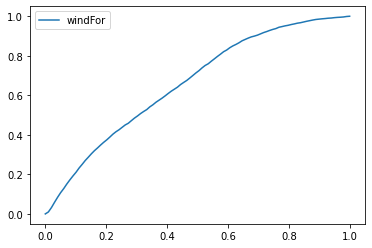

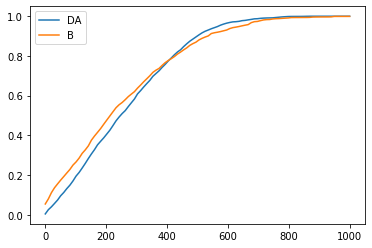

In [4]:
# list of x values to plot from 0 to 1
x = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1000, 100)

# plot the CDFs
plt.plot(x, ecdf_power(x), label='windFor')
plt.legend()
plt.show()
# new plot
plt.plot(x2, ecdf_nominal(x2), label='DA')
plt.plot(x2, ecdf_bal_price(x2), label='B')
plt.legend()
plt.show()


In [5]:
# compute the transform of the variables
y_power = ecdf_power(df['windMeas'])
y_nominal = ecdf_nominal(df['spotMeas'])
y_bal_price = ecdf_bal_price(df['imbalMeas'])


In [6]:
# all y==0 are set to 0.0001
y_power[y_power == 0] = 0.01
y_nominal[y_nominal == 0] = 0.01
y_bal_price[y_bal_price == 0] = 0.01

# all y==1 are set to 0.9999
y_power[y_power == 1] = 0.99
y_nominal[y_nominal == 1] = 0.99
y_bal_price[y_bal_price == 1] = 0.99


(array([0.00322838, 0.        , 0.00322838, 0.        , 0.00322838,
        0.00322838, 0.00322838, 0.00645675, 0.00322838, 0.00968513,
        0.00645675, 0.00968513, 0.0129135 , 0.01614188, 0.        ,
        0.03874051, 0.025827  , 0.025827  , 0.03874051, 0.03874051,
        0.03874051, 0.04196888, 0.08393776, 0.00645675, 0.08393776,
        0.        , 0.        , 0.37126318, 0.10976477, 0.15496202,
        0.15496202, 0.16787552, 0.1969309 , 0.18724578, 0.23244303,
        0.24535654, 0.25181329, 0.27118354, 0.29055379, 0.30346729,
        0.31960917, 0.33252267, 0.34866455, 0.35189293, 0.37771993,
        0.3809483 , 0.38417668, 0.39386181, 0.34543617, 0.45197256,
        0.39709018, 0.3809483 , 0.41000368, 0.38417668, 0.3809483 ,
        0.34866455, 0.3809483 , 0.34866455, 0.33252267, 0.31960917,
        0.30346729, 0.28732542, 0.27118354, 0.25504166, 0.23889978,
        0.22275791, 0.20338765, 0.18724578, 0.1711039 , 0.1581904 ,
        0.14204852, 0.12590664, 0.11622152, 0.09

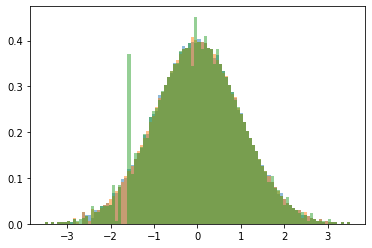

In [7]:
# transform y varialbes to using inverse normal from scipy
from scipy.stats import norm
x_power = norm.ppf(y_power)
x_nominal = norm.ppf(y_nominal)
x_bal_price = norm.ppf(y_bal_price)

# plot the transformed variables
plt.hist(x_power, bins=100, density=True, alpha=0.5, label='Power')
plt.hist(x_nominal, bins=100, density=True, alpha=0.5, label='DA')
plt.hist(x_bal_price, bins=100, density=True, alpha=0.5, label='B')


In [8]:
# Split observations into vectors of length 8
x_power_8 = np.array_split(x_power, len(x_power)/8)
x_nominal_8 = np.array_split(x_nominal, len(x_nominal)/8)
x_bal_price_8 = np.array_split(x_bal_price, len(x_bal_price)/8)


In [9]:
# concatenate the vectors into a matrix
X = np.column_stack((x_power_8, x_nominal_8, x_bal_price_8))


In [10]:
# compute covariance of X (remove observations with nan values)
cov_X = np.cov(X, rowvar=False, ddof=0, aweights=None, fweights=None, bias=False)

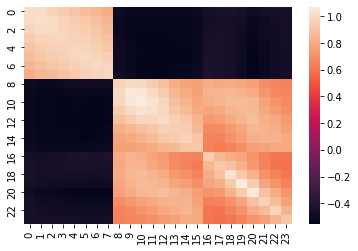

In [11]:
# print covariance matrix as heatmap
import seaborn as sns
sns.heatmap(cov_X, annot=False)
plt.show()



In [12]:
# set seed
np.random.seed(420)

# sample 500 observations from the multivariate normal distribution
X_sample = np.random.multivariate_normal(np.zeros(24), cov_X, 500)


In [13]:
# transform the sample back to the original variables
y_power_sample = norm.cdf(X_sample[:,0:8])
y_nominal_sample = norm.cdf(X_sample[:,8:16])
y_bal_price_sample = norm.cdf(X_sample[:,16:24])

In [14]:
# deine list
power_actual_sample = []
nominal_sample = []
bal_price_sample = []

# loop through each row of the sample
for i in range(0, len(y_power_sample)):
    # inverse CDF of windMeas
    power_actual_sample.append(iecdf_power(y_power_sample[i]))
    # inverse CDF of spotMeas
    nominal_sample.append(iecdf_nominal(y_nominal_sample[i]))
    # inverse CDF of imbalMeas
    bal_price_sample.append(iecdf_bal_price(y_bal_price_sample[i]))
    


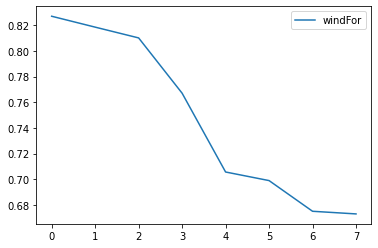

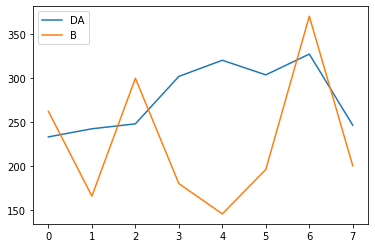

In [15]:
# plot the first sample
plt.plot(power_actual_sample[0], label='windFor')
plt.legend()
plt.show()

plt.plot(nominal_sample[0], label='DA')
plt.plot(bal_price_sample[0], label='B')
plt.legend()
plt.show()




In [16]:
# stack all samples into a matrix
X_sample = np.column_stack((nominal_sample, bal_price_sample,power_actual_sample))
X_sample.shape

(500, 24)

In [17]:
# save the samples to a csv file
np.savetxt("X_sample.csv", X_sample, delimiter=",")

